In [2]:
import pandas as pd
import gc
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

## 数据加载
### 转换成格式合理的.csv文件

In [3]:
lng_path = "data/lng2.csv"
lng_new_path = "data/lng2_new.csv"
content = open(lng_path)
with open(lng_new_path, "w") as f:
    for line in content:
        f.write(line.replace(" ", ","))
with open(lng_new_path, 'r+') as f:
    content = f.read()
    f.seek(0, 0)
    f.write('id,time,status,velocity,longitude,latitude,draft\n' + content)

### 读取csv并且绘制原始图像

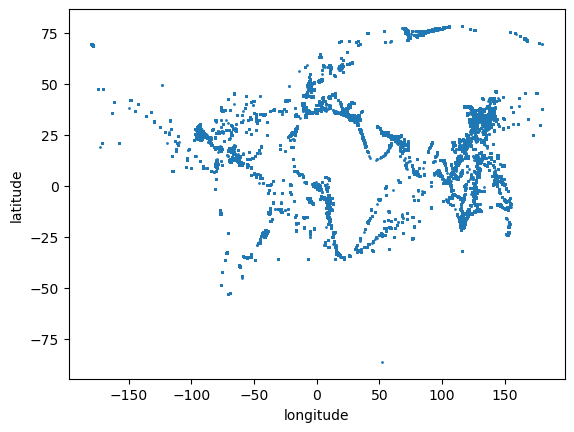

In [4]:
dataFrame = pd.read_csv("data/lng2_new.csv",sep=",")
plt.scatter(dataFrame['longitude'],dataFrame['latitude'],s=1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

## 数据预处理
### 去除高速和零吃水状态

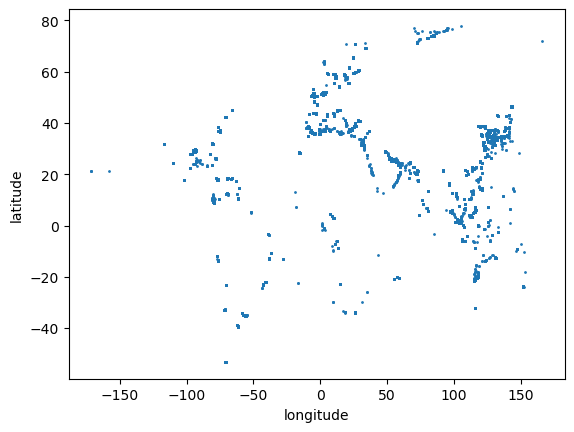

,id,time,status,velocity,longitude,latitude,draft
81,205421000,1621115903,1,0,-93.691132,29.430000,90
90,205421000,1621118605,1,0,-93.691269,29.429684,90
91,205421000,1621119143,1,0,-93.691299,29.429701,90
93,205421000,1621119324,1,0,-93.691299,29.429684,90
96,205421000,1621120041,1,0,-93.691299,29.429701,90
...,...,...,...,...,...,...,...
7896832,636092943,1635453523,1,0,103.651276,1.217855,112
7896858,636092943,1635458747,1,0,103.648239,1.214497,112
7896862,636092943,1635459467,1,0,103.648277,1.214635,112
7896865,636092943,1635460004,1,0,103.648209,1.214813,112


In [5]:
data_tmp = dataFrame[(dataFrame['draft'] != 0) & (dataFrame['velocity'] == 0) & (dataFrame['draft'] < 300) ]
del dataFrame
plt.scatter(data_tmp["longitude"],data_tmp["latitude"],s=1)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()
data_tmp

In [6]:
n_clusters =1354   #sqrt(data_tmp.shape[0]/2)

#取出经经纬度
lng_long_lati = pd.DataFrame(data_tmp,columns=['longitude','latitude'])


cluster = KMeans(n_clusters=n_clusters, random_state=9).fit(lng_long_lati)

pred = cluster.labels


D:\Anaconda\envs\pytorch_38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 